# Data Cleaning and Exploratory Data Analysis

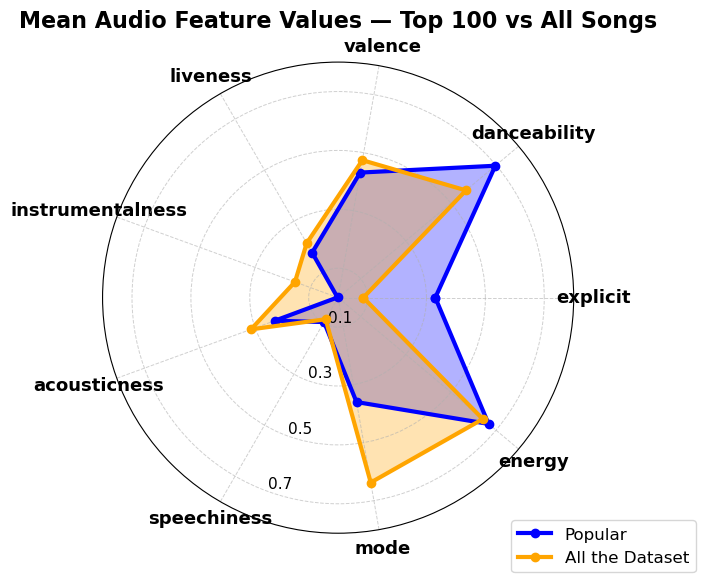

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/spotify_tracks.csv")
features_cols = [
    "explicit", "danceability", "valence", "liveness", 
    "instrumentalness", "acousticness", "speechiness", "mode", "energy"
]
df = df.dropna(subset=features_cols + ["popularity"])
sorted_df = df.sort_values("popularity", ascending=False)
top100 = sorted_df.head(100)
labels = features_cols
features_top = top100[labels].mean().tolist()
features_all = df[labels].mean().tolist()
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
values_top = features_top + features_top[:1]
values_all = features_all + features_all[:1]

plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values_top, 'o-', linewidth=3, label="Popular", color='blue')
ax.fill(angles, values_top, alpha=0.3, color='blue')

ax.plot(angles, values_all, 'o-', linewidth=3, label="All the Dataset", color='orange')
ax.fill(angles, values_all, alpha=0.3, color='orange')

ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=13, weight='bold')
ax.set_title("Mean Audio Feature Values — Top 100 vs All Songs", fontsize=16, pad=25, weight='bold')

ax.set_rlabel_position(250)
ax.set_yticks([0.1, 0.3, 0.5, 0.7])
ax.set_yticklabels(["0.1", "0.3", "0.5", "0.7"], fontsize=11)
ax.set_ylim(0, 0.8)
ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

plt.legend(loc="lower left", bbox_to_anchor=(0.85, -0.1), fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

Looking at the radar chart, clear distinctions emerge between the most popular songs and the rest of the dataset across nearly all Spotify audio features. The Top 100 songs tend to be more danceable, energetic, and explicit, reflecting a preference for upbeat, high-intensity tracks that are optimized for mainstream appeal and streaming engagement. These songs often feature stronger rhythmic elements and production energy designed to attract a wider audience.

In contrast, songs in the broader dataset show relatively higher acousticness, instrumentalness, and valence, suggesting that less-popular tracks are more likely to include acoustic or instrumental components and convey a slightly more positive or relaxed emotional tone. Overall, this pattern implies that popularity on Spotify aligns more with energy, rhythm, and bold lyrical content than with softness or positivity — energetic, dynamic songs are more likely to reach the charts.

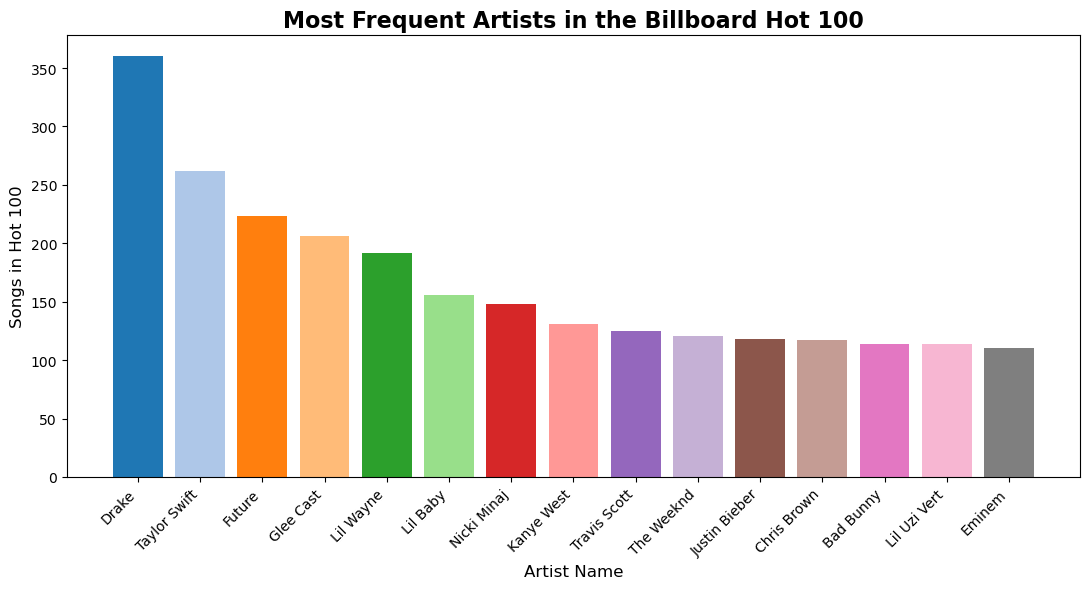

In [2]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

hot100 = pd.read_csv("../data/Hot 100.csv")

artist_col = "performer" 
song_col = "song" if "song" in hot100.columns else "title"
hot100 = hot100.dropna(subset=[artist_col, song_col])

unique_songs = hot100[[artist_col, song_col]].drop_duplicates()

def clean_artists(text):
    text = str(text)
    text = re.sub(r"[\[\]']", "", text)
    text = re.sub(r"(?i)\b(feat\.?|featuring|ft\.?)\b", ",", text)
    text = text.replace("&", ",").replace(" x ", ",").replace(" X ", ",")
    parts = [p.strip() for p in text.split(",") if p.strip()]
    return parts

expanded = []
for _, row in unique_songs.iterrows():
    artists = clean_artists(row[artist_col])
    for a in artists:
        expanded.append(a)

artist_counts = Counter(expanded)
artist_df = (
    pd.DataFrame(artist_counts.items(), columns=["Artist", "Count"])
    .sort_values("Count", ascending=False)
    .head(15)
)

plt.figure(figsize=(11,6))
colors = plt.cm.tab20(range(len(artist_df)))

plt.bar(artist_df["Artist"], artist_df["Count"], color=colors)
plt.title("Most Frequent Artists in the Billboard Hot 100",
          fontsize=16, weight='bold')
plt.xlabel("Artist Name", fontsize=12)
plt.ylabel("Songs in Hot 100", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


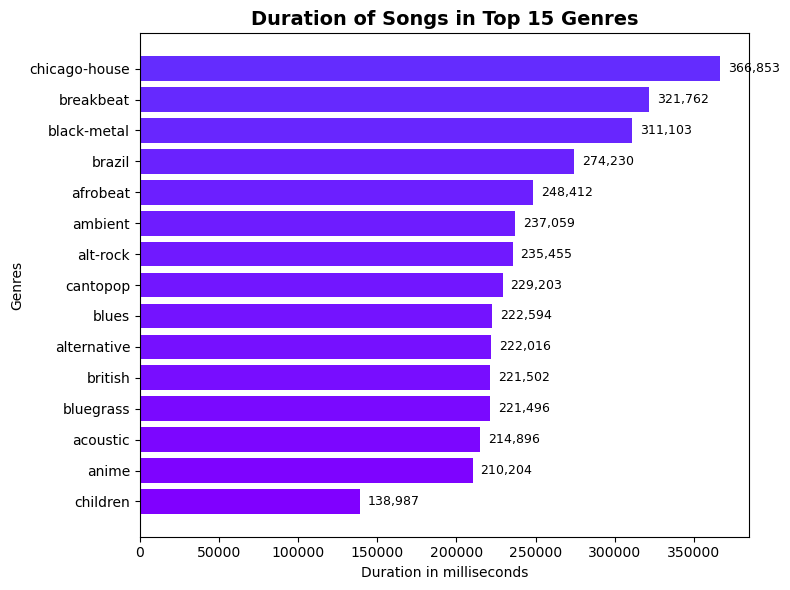

In [3]:
spotify = pd.read_csv("../data/spotify_tracks.csv")
genre_counts = spotify["track_genre"].value_counts()
top_genres = genre_counts.head(15).index  
subset = spotify[spotify["track_genre"].isin(top_genres)]
genre_duration = (
    subset.groupby("track_genre")["duration_ms"]
    .mean()
    .sort_values(ascending=True)
)
plt.figure(figsize=(8,6))
colors = plt.cm.rainbow(range(len(genre_duration)))
plt.barh(genre_duration.index, genre_duration.values, color=colors)
plt.title("Duration of Songs in Top 15 Genres", fontsize=14, weight='bold')
plt.xlabel("Duration in milliseconds")
plt.ylabel("Genres")
for i, v in enumerate(genre_duration.values):
    plt.text(v + 5000, i, f"{int(v):,}", va='center', fontsize=9)
plt.tight_layout()
plt.show()

From the bar chart, we can observe significant variation in song duration across the top 15 genres. Genres like Chicago House, Breakbeat, and Black Metal have the longest average durations, typically exceeding 300,000 milliseconds (or around 5 minutes). These genres are known for their extended instrumental segments, layered production, and gradual build-ups, which naturally lead to longer tracks.

In contrast, genres such as Children’s music, Anime, and Acoustic tend to have shorter average durations, often under 220,000 milliseconds (about 3.5 minutes). This shorter length likely reflects their focus on accessibility, simplicity, or audience attention span. For instance, children’s songs are intentionally brief to maintain engagement.

Overall, this pattern suggests that genre conventions strongly influence song length, with experimental or performance-driven genres favoring longer compositions, while mainstream or narrative-based genres emphasize brevity and listener retention.